<a href="https://colab.research.google.com/github/sush0037/my-portfolio/blob/master/indian_district_population_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#import dataset
from google.colab import files
uploaded = files.upload()


Saving census2011.csv to census2011 (2).csv


In [41]:
# load dataset
import numpy as np
import pandas as pd
df = pd.read_csv('census2011.csv')
df.head()
total_rows = len(df)
print (total_rows)

610


In [42]:
# preprocessing dataset
df = df.dropna() # drop rows with missing values
# Convert 'Population' column to numeric, removing commas
df['Population'] = df['Population'].str.replace(',', '').astype(float)
df.head()
total_rows = len(df)
print (total_rows)

610


In [43]:
# split dataset

np.random.seed(42)
np.indices = np.random.permutation(len(df))
training = int (0.7 * len(df))
validation = int (0.85 * len(df))
training_indices = np.indices[:training]
validation_indices = np.indices[training:validation]
test_indices = np.indices[validation:]
training_df = df.iloc[training_indices]
validation_df = df.iloc[validation_indices]
test_df = df.iloc[test_indices]


In [44]:
# implement linear regression
# defining function using GD
def batch_gradient_descent(X, y, learning_rate=0.01, epochs=100):
    n = len(y)
    X_b = np.c_[np.ones((n, 1)), X]
    theta = np.random.randn(X_b.shape[1])
    losses = []
    for epoch in range(epochs):
        y_pred = X_b.dot(theta)
        error = y_pred - y
        gradients = 2/n * X_b.T.dot(error)
        theta = theta - learning_rate * gradients
        losses.append(np.mean(error**2))
    return theta, losses


In [45]:
# defining function using SGD
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=100):
  n = len(y)
  X_b = np.c_[np.ones((n, 1)), X]
  theta = np.zeros(X_b.shape[1])
  losses = []
  for epoch in range(epochs):
    indices = np.random.permutation(n)
    for i in indices:
      xi = X_b[i:i+1]
      yi = y[i]
      error = xi.dot(theta) - yi
      grad = 2 * xi.T.dot(error)
      theta = theta - learning_rate * grad.flatten()
      losses.append(np.mean(error**2))
      return theta, losses


In [46]:
# Train the models
X_train = training_df['Population'].values.reshape(-1,1)
y_train = training_df['Literacy'].values
X_val = validation_df['Population'].values.reshape(-1,1)
y_val = validation_df['Literacy'].values
X_test = test_df['Population'].values.reshape(-1,1)
y_test = test_df['Literacy'].values

theta_gd, losses_gd = batch_gradient_descent(X_train, y_train, learning_rate=0.01, epochs=100)
theta_sgd, losses_sgd = stochastic_gradient_descent(X_train, y_train, learning_rate=0.01, epochs=100)





/tmp/ipython-input-546547387.py:13: RuntimeWarning: overflow encountered in square
  losses.append(np.mean(error**2))
/tmp/ipython-input-546547387.py:12: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * gradients


In [47]:
#Evaluate models

def mse(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)
def rmse(y_true, y_pred):
  return np.sqrt(np.mean((y_true - y_pred)**2))
def mae(y_true, y_pred):
  return np.mean(np.abs(y_true - y_pred))
def r2(y_true, y_pred):
  ss_res = np.sum((y_true - y_pred)**2)
  ss_tot = np.sum((y_true - np.mean(y_true))**2)
  return 1 - (ss_res / ss_tot)

y_val_pred_gd = np.c_[np.ones((len(X_val), 1)), X_val].dot(theta_gd)
y_val_pred_sgd = np.c_[np.ones((len(X_val), 1)), X_val].dot(theta_sgd)

metrics = pd.DataFrame({
    'Model': ['GD', 'SGD'],
    'Val_MSE': [mse(y_val, y_val_pred_gd), mse(y_val, y_val_pred_sgd)],
    'Val_RMSE':[rmse(y_val, y_val_pred_gd), rmse(y_val, y_val_pred_sgd)],
    'Val_MAE': [mae(y_val, y_val_pred_gd), mae(y_val, y_val_pred_sgd)],
    'Val_R2': [r2(y_val, y_val_pred_gd), r2(y_val, y_val_pred_sgd)]
})
metrics

,Model,Val_MSE,Val_RMSE,Val_MAE,Val_R2
0,GD,NaN,NaN,NaN,NaN
1,SGD,3.085977e+25,5.555157e+12,4.325348e+12,-2.888293e+23


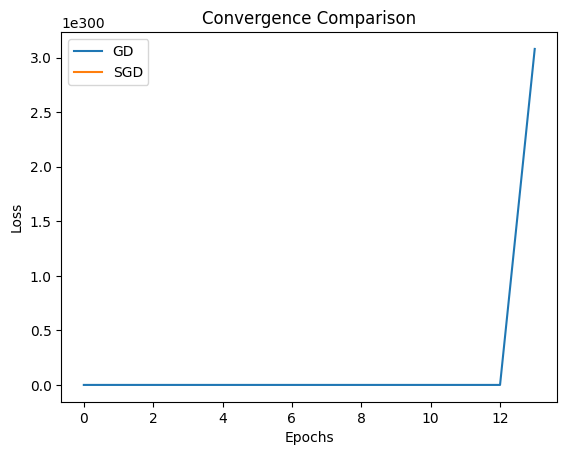

In [48]:
# Generate Visualizations
# Creating scatter plots for predicted vs actual values, residual plots, convergence comparison plots and learning rate sensitivity analysis

import matplotlib.pyplot as plt

plt.plot(losses_gd, label='GD')
plt.plot(losses_sgd, label='SGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Convergence Comparison')
plt.legend()
plt.show()

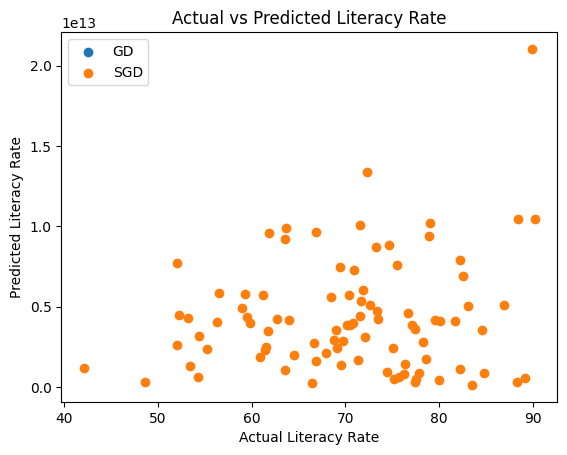

In [49]:
plt.scatter(y_val,y_val_pred_gd, label='GD')
plt.scatter(y_val,y_val_pred_sgd, label='SGD')
plt.xlabel('Actual Literacy Rate')
plt.ylabel('Predicted Literacy Rate')
plt.title('Actual vs Predicted Literacy Rate')
plt.legend()
plt.show()


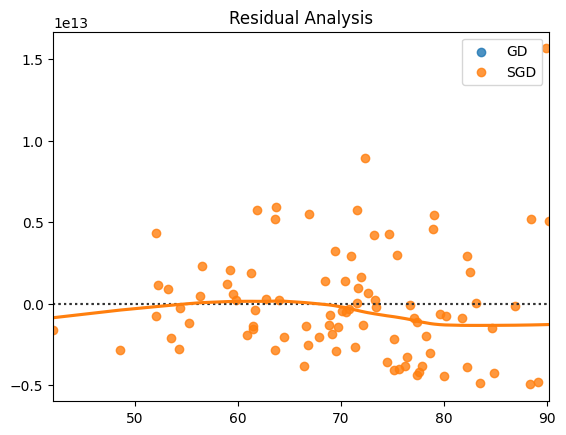

In [51]:
import seaborn as sns
sns.residplot(x=y_val, y=y_val_pred_gd, lowess=True, label='GD')
sns.residplot(x=y_val, y=y_val_pred_sgd, lowess=True, label ='SGD')
plt.title('Residual Analysis')
plt.legend()
plt.show()